## 1.Load and explore data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style='white', context='notebook', palette='muted')

import matplotlib.pyplot as plt

customerData = pd.read_excel('./CustomersData.xlsx')
couponData = pd.read_csv('./Discount_Coupon.csv')
onlineSalesData = pd.read_csv('./Online_Sales.csv')
marketingSpendData = pd.read_csv('./Marketing_Spend.csv')
taxAmountData = pd.read_excel('./Tax_amount.xlsx')

In [2]:
display(customerData.head())

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [3]:
display(couponData.head())

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [4]:
display(onlineSalesData.head())

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [5]:
display(marketingSpendData.head())

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [6]:
display(taxAmountData.head())

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [7]:
couponData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [8]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [9]:
onlineSalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [10]:
marketingSpendData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [11]:
taxAmountData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


<Axes: xlabel='Gender', ylabel='count'>

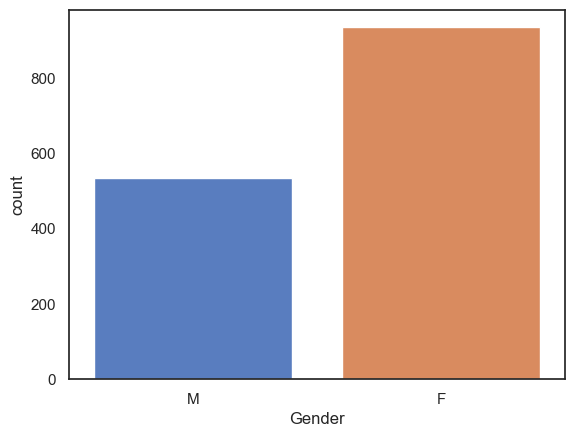

In [12]:
sns.countplot(data=customerData, x='Gender')

<Axes: xlabel='Location', ylabel='count'>

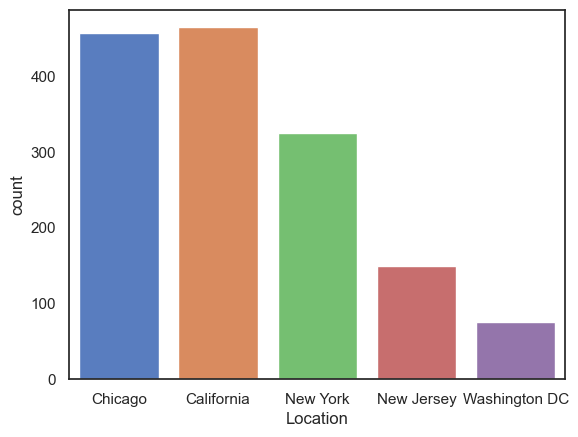

In [13]:
sns.countplot(data=customerData, x='Location')

<Axes: xlabel='Location', ylabel='count'>

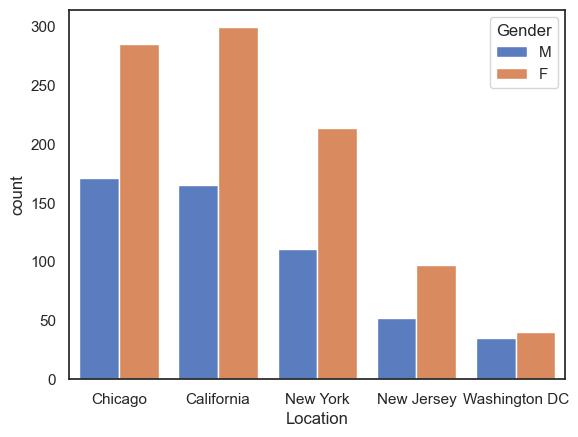

In [14]:
sns.countplot(data=customerData, x='Location', hue='Gender')

<Axes: xlabel='count', ylabel='Product_Category'>

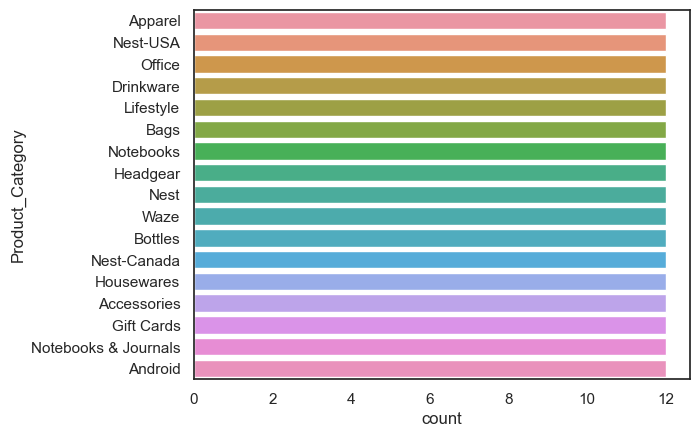

In [15]:
sns.countplot(data=couponData, y='Product_Category')

<Axes: xlabel='Discount_pct', ylabel='count'>

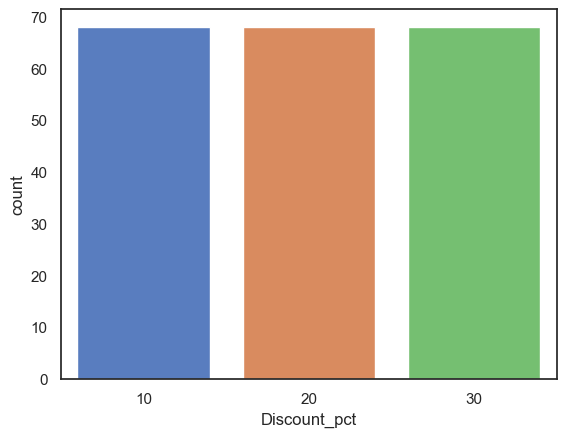

In [16]:
sns.countplot(data=couponData, x='Discount_pct')

<Axes: xlabel='Month', ylabel='count'>

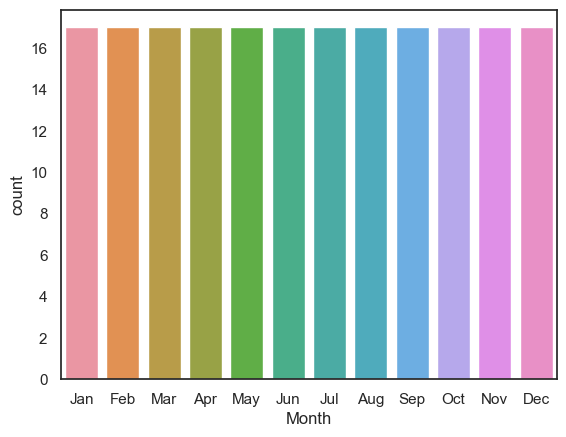

In [17]:
sns.countplot(data=couponData, x='Month')

### Merge data

In [190]:
# add month from transaction_date
onlineSalesData['Transaction_Date'] = pd.to_datetime(onlineSalesData['Transaction_Date'], format='mixed')
onlineSalesData['Month'] = onlineSalesData['Transaction_Date'].dt.strftime('%b')
onlineSalesData['Month_Num'] =onlineSalesData['Transaction_Date'].dt.strftime('%Y-%m')
onlineSalesData.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Month_Num
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,2019-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,2019-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,2019-01


In [191]:
onlineSalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
 11  Month_Num            52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


### sale merge discount data -> saleDiscountData

In [227]:
saleDiscountData = pd.merge(onlineSalesData, couponData, on=['Month', 'Product_Category'], how='left')
saleDiscountData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
 11  Month_Num            52924 non-null  object        
 12  Coupon_Code          52524 non-null  object        
 13  Discount_pct         52524 non-

### saleDiscountData merge customerData -> saleDiscountCusData

In [229]:
saleDiscountCusData = pd.merge(saleDiscountData, customerData, on=['CustomerID'], how='left')
saleDiscountCusData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
 11  Month_Num            52924 non-null  object        
 12  Coupon_Code          52524 non-null  object        
 13  Discount_pct         52524 non-

### saleDiscountCusData merge tax data -> saleDiscountCusTaxData

In [233]:
saleDiscountCusTaxData = pd.merge(saleDiscountCusData, taxAmountData, on=['Product_Category'], how='left')
saleDiscountCusTaxData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
 11  Month_Num            52924 non-null  object        
 12  Coupon_Code          52524 non-null  object        
 13  Discount_pct         52524 non-

In [234]:
# fill missing data
saleDiscountCusTaxData['Coupon_Code'].fillna('Unknown', inplace=True)
saleDiscountCusTaxData['Discount_pct'].fillna(0, inplace=True)
saleDiscountCusTaxData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
 11  Month_Num            52924 non-null  object        
 12  Coupon_Code          52924 non-null  object        
 13  Discount_pct         52924 non-

In [235]:
print(saleDiscountCusTaxData.groupby('Coupon_Status')['Coupon_Status'].value_counts())

Coupon_Status
Clicked     26926
Not Used     8094
Used        17904
Name: count, dtype: int64


In [236]:
print(saleDiscountCusTaxData.groupby('Quantity')['Quantity'].value_counts())

Quantity
1      35336
2       7016
3       2288
4       1237
5       1734
       ...  
600        5
750        1
791        1
825        2
900        1
Name: count, Length: 151, dtype: int64


### create function for calculating invoice

In [237]:
def calInvoice(avg_price, discount_pct, GST, Delivery_Charges, Quantity):
    return Quantity * avg_price * (1 - discount_pct/100) * (1 + GST) + Delivery_Charges

### calculate invoice data

In [239]:
saleDiscountCusTaxData['Invoice'] = np.where(
    'Used' == saleDiscountCusTaxData['Coupon_Status'],
    calInvoice(saleDiscountCusTaxData['Avg_Price'], saleDiscountCusTaxData['Discount_pct'], saleDiscountCusTaxData['GST'],
              saleDiscountCusTaxData['Delivery_Charges'], saleDiscountCusTaxData['Quantity']),
    calInvoice(saleDiscountCusTaxData['Avg_Price'], 0, saleDiscountCusTaxData['GST'],
              saleDiscountCusTaxData['Delivery_Charges'], saleDiscountCusTaxData['Quantity'])
)

saleDiscountCusTaxData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
 11  Month_Num            52924 non-null  object        
 12  Coupon_Code          52924 non-null  object        
 13  Discount_pct         52924 non-

## 2.Basic analysis

### find out how many new customers per month

In [240]:
customer_groupby_month_data = saleDiscountCusTaxData.groupby('Month')['CustomerID'].nunique()
customer_groupby_month_data_bar = customer_groupby_month_data.to_frame()
customer_groupby_month_data_bar

,CustomerID
Month,
Apr,224
Aug,300
Dec,236
Feb,109
Jan,215
Jul,236
Jun,259
Mar,208
May,200


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Customer Count'),
 Text(0.5, 1.0, 'Customer Count By Month')]

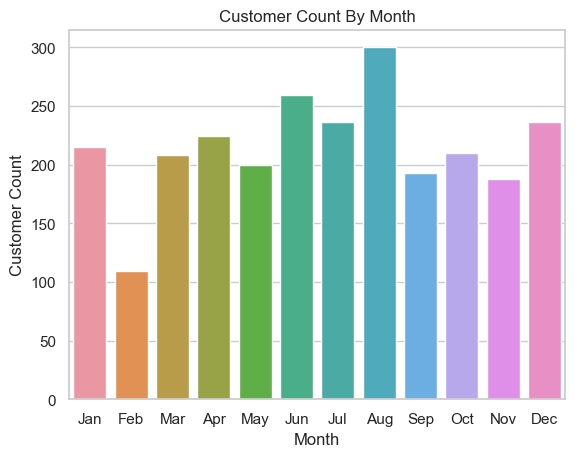

In [241]:
all_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = sns.barplot(data=customer_groupby_month_data_bar, 
            x=customer_groupby_month_data_bar.index,  order=all_month,
            y='CustomerID')
ax.set(xlabel='Month', ylabel='Customer Count', title='Customer Count By Month')

### show the retention of customers by month

[Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Retention Count'),
 Text(0.5, 1.0, 'Customer Retention By Month')]

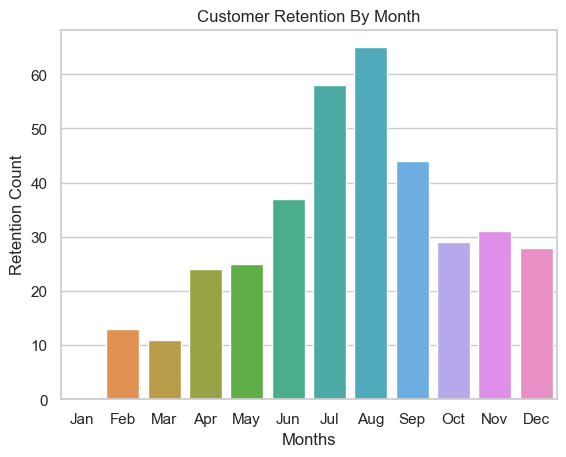

In [242]:
allMonthData = {}

for month in all_month:
    allMonthData[month] = saleDiscountCusTaxData[saleDiscountCusTaxData['Month']==month]['CustomerID'].unique().tolist()

# treat first month as no loss
retention = [0]
for i in range(11):
    currentMonthSet = set(allMonthData[MonthData[i]])
    nextMonthSet = set(allMonthData[MonthData[i+1]])
    retentionCount = len(currentMonthSet.intersection(nextMonthSet))
    retention.append(retentionCount)


ax = sns.barplot(x=MonthData, y=retention)
ax.set(xlabel='Months', ylabel='Retention Count', title='Customer Retention By Month')

### the revenue from existing/new customer by month

In [202]:
customerCache = set()

newCustomerByMonth = {}
existingCustomerByMonth = {}

newCustomerCountByMonth = {}
existingCustomerCountByMonth = {}


for month in MonthData:
    newCustomerByMonth[month] = set()
    existingCustomerByMonth[month] = set()
    
    m = allMonthData[month]
    for x in m:
        if x not in customerCache:
            newCustomerByMonth[month].add(x)
        else:
            existingCustomerByMonth[month].add(x)
        customerCache.add(x)
    
    newCustomerCountByMonth[month] = len(newCustomerByMonth[month])
    existingCustomerCountByMonth[month] = len(existingCustomerByMonth[month])


In [243]:
newCustomerRevenueByMonth = {}
existingCustomerRevenueByMonth = {}

for month, ids in newCustomerByMonth.items():
    newCustomerRevenueByMonth[month] = saleDiscountCusTaxData[(saleDiscountCusTaxData['Month'] == month) &
                                                          (saleDiscountCusTaxData['CustomerID'].isin(ids))]['Invoice'].sum()
    
for month, ids in existingCustomerByMonth.items():
    existingCustomerRevenueByMonth[month] = saleDiscountCusTaxData[(saleDiscountCusTaxData['Month'] == month) &
                                                          (saleDiscountCusTaxData['CustomerID'].isin(ids))]['Invoice'].sum()

<Axes: xlabel='Month', ylabel='Revenue'>

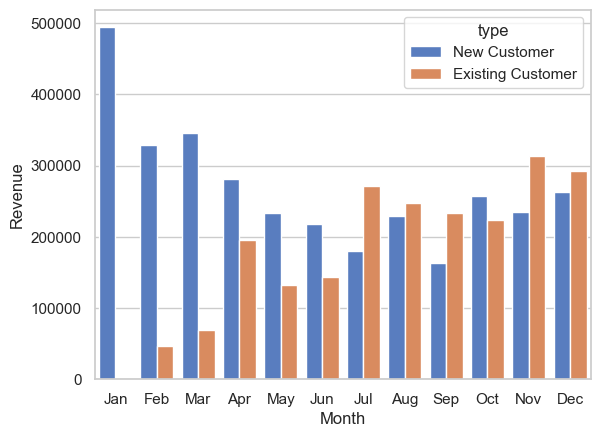

In [204]:
ds1 = pd.DataFrame({'Month':newCustomerRevenueByMonth.keys(),
                   'Revenue':newCustomerRevenueByMonth.values()})

ds2 = pd.DataFrame({'Month':existingCustomerRevenueByMonth.keys(),
                   'Revenue':existingCustomerRevenueByMonth.values()})

ds1['type'] = 'New Customer'
ds2['type'] = 'Existing Customer'
data_tmp = pd.concat([ds1, ds2])

sns.barplot(x='Month', y='Revenue', hue='type', data=data_tmp)


### the discount affect in revenue

In [244]:
saleDiscountCusTaxData.groupby('Discount_pct')['Discount_pct'].value_counts()

Discount_pct
0.0       400
10.0    17470
20.0    17830
30.0    17224
Name: count, dtype: int64

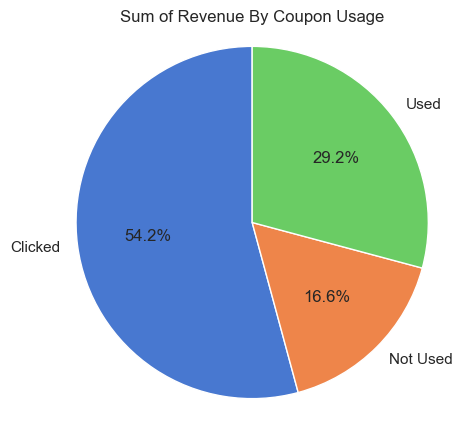

In [245]:
invoiceSum = saleDiscountCusTaxData.groupby('Coupon_Status')['Invoice'].sum()

sns.set_style('whitegrid')

plt.figure(figsize=(5,5))
plt.pie(invoiceSum, labels=invoiceSum.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Sum of Revenue By Coupon Usage')

plt.show()

### most selled product 

In [207]:
products = saleDiscountCusTaxData.groupby('Product_SKU')['Quantity'].sum()

products

Product_SKU
GGOEA0CH077599     515
GGOEAAAB034813      22
GGOEAAAB034814      57
GGOEAAAB034815      41
GGOEAAAB034816      24
                  ... 
GGOEYOCR077399     246
GGOEYOCR077799    1488
GGOEYOCR078099     445
GGOEYOLR018699    1443
GGOEYOLR080599     361
Name: Quantity, Length: 1145, dtype: int64

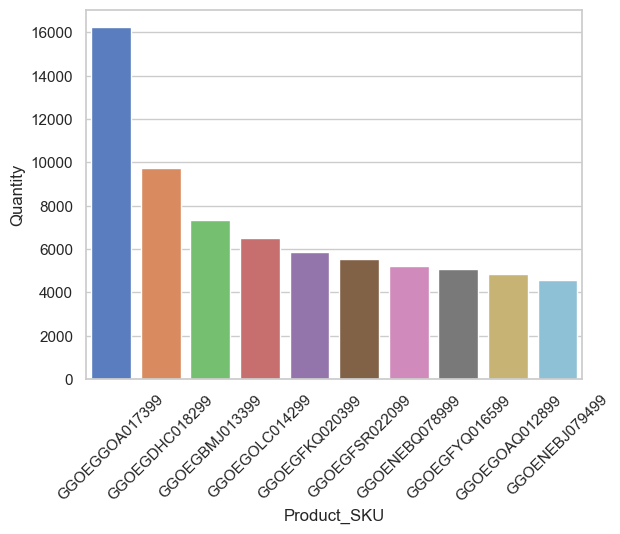

In [208]:
# findout highest total quantity
top10Sku = products.sort_values(ascending=False).head(10).to_frame()

ax = sns.barplot(data=top10Sku, x=top10Sku.index, y='Quantity')
for item in ax.get_xticklabels():
    item.set_rotation(45)


In [246]:
top10Sku = top10Sku.reset_index()

filterSku = saleDiscountCusTaxData[saleDiscountCusTaxData['Product_SKU'].isin(top_10_sku['Product_SKU'])]

# check product detail
productDetail = filter_sku.groupby('Product_SKU').agg({
     'Product_Description': 'first',
    'Product_Category': 'first',
     'Quantity': 'sum',
    'Invoice': 'sum'
}).reset_index()

productDetail.columns = ['Product ID', 'Product Description', 'Product Category', 'Quantity', 'Revenue']
productDetail

,Product ID,Product Description,Product Category,Quantity,Revenue
0,GGOEGBMJ013399,Sport Bag,Bags,7321,42068.25962
1,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,9728,37418.94532
2,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,5847,24533.63450
3,GGOEGFSR022099,Google Kick Ball,Lifestyle,5549,15676.89884
4,GGOEGFYQ016599,Foam Can and Bottle Cooler,Drinkware,5098,11559.08054
5,GGOEGGOA017399,Maze Pen,Office,16234,19786.07210
6,GGOEGOAQ012899,Ballpoint LED Light Pen,Office,4861,15697.98510
7,GGOEGOLC014299,Google Metallic Notebook Set,Office,6496,41481.37750
8,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,4570,731870.69120
9,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,5206,671620.06650


###  Analyze revenue,  quantity by category/month/week and day etc.

In [247]:
saleDiscountCusTaxData.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Month_Num,Coupon_Code,Discount_pct,Gender,Location,Tenure_Months,GST,Invoice
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019-01,ELEC10,10.0,M,Chicago,12,0.10,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019-01,ELEC10,10.0,M,Chicago,12,0.10,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,2019-01,OFF10,10.0,M,Chicago,12,0.10,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,2019-01,SALE10,10.0,M,Chicago,12,0.18,109.9270
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,2019-01,AIO10,10.0,M,Chicago,12,0.18,24.0230


### Revenue of year

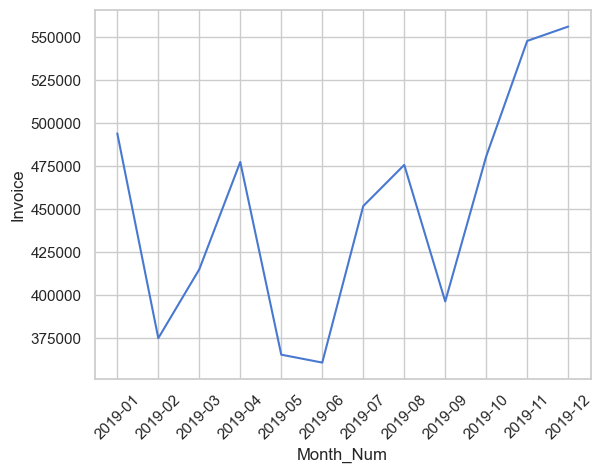

In [248]:
yearRevenue = saleDiscountCusTaxData.groupby('Month_Num')['Invoice'].sum().to_frame()

ax = sns.lineplot(data=yearRevenue, x=yearRevenue.index, y='Invoice')
for item in ax.get_xticklabels():
    item.set_rotation(45)

### Top 2 revenue month

In [251]:
top2Month = saleDiscountCusTaxData.groupby('Month')['Invoice'].sum().sort_values(ascending=False).head(2)

top2Month

Month
Dec    556112.29179
Nov    547788.12626
Name: Invoice, dtype: float64

### Top 5 revenue week

In [252]:
saleDiscountCusTaxData['Week'] = saleDiscountCusTaxData['Transaction_Date'].dt.strftime('%Y-%U')

top5Week = saleDiscountCusTaxData.groupby('Week')['Invoice'].sum().sort_values(ascending=False).head()

top5Week

Week
2019-47    171552.61754
2019-50    159533.68695
2019-49    151547.43730
2019-15    138720.69510
2019-48    135702.55428
Name: Invoice, dtype: float64

### Revenue of week of year

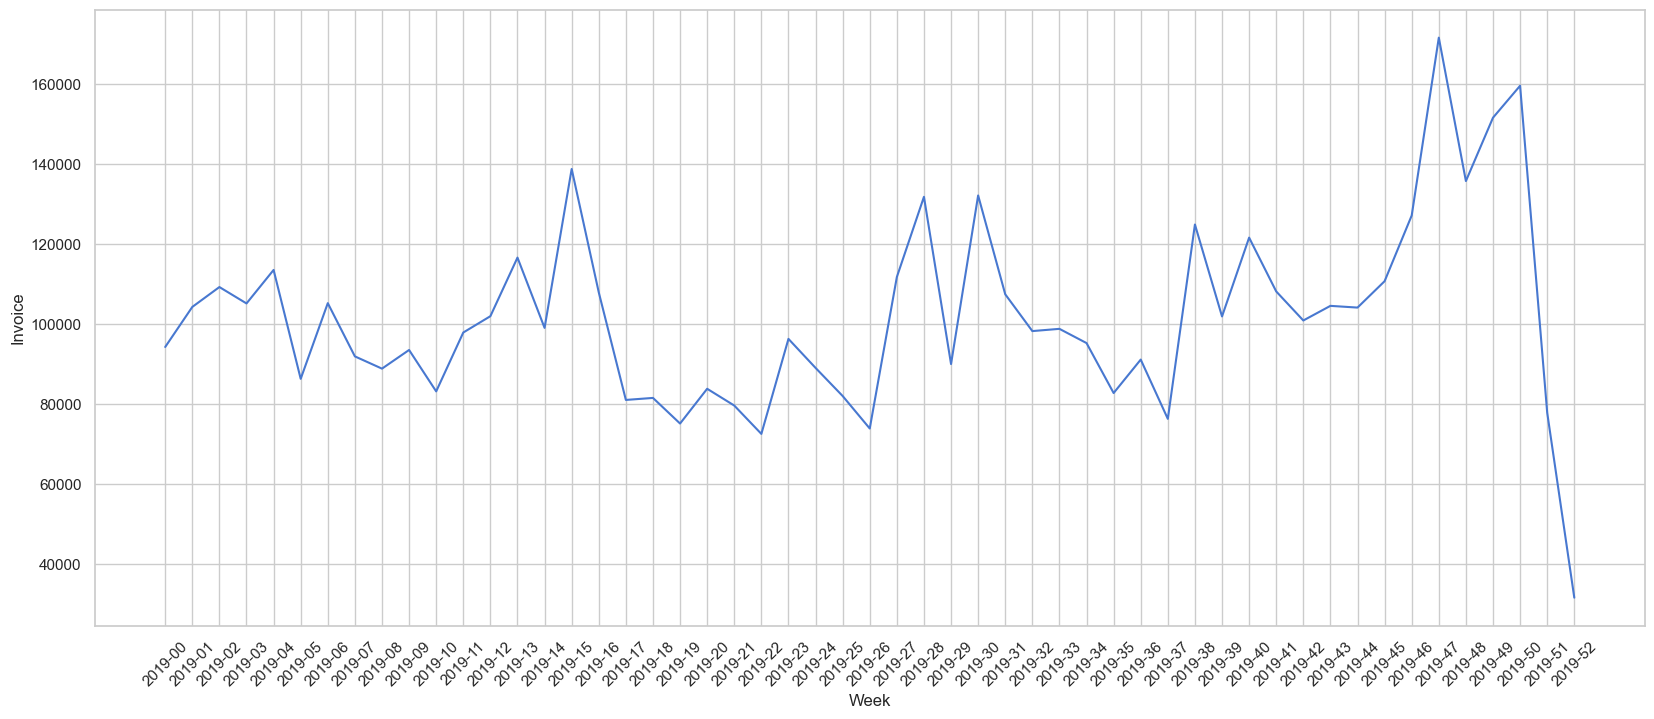

In [253]:
weekRevenue = saleDiscountCusTaxData.groupby('Week')['Invoice'].sum().to_frame()

plt.figure(1, figsize = (20,8))
ax = sns.lineplot(data=weekRevenue, x=weekRevenue.index, y='Invoice')
for item in ax.get_xticklabels():
    item.set_rotation(45)

###  Top 10 revenue day

In [254]:
saleDiscountCusTaxData['Date'] = saleDiscountCusTaxData['Transaction_Date'].dt.date

top10day = saleDiscountCusTaxData.groupby('Date')['Invoice'].sum().sort_values(ascending=False).head(10)

top10day


Date
2019-04-05    59951.48052
2019-11-27    56662.02888
2019-04-18    54471.40715
2019-07-18    42947.02071
2019-08-02    40533.19244
2019-02-14    36217.60078
2019-12-11    33192.46497
2019-07-13    32276.41812
2019-12-18    32006.00544
2019-12-15    30862.77291
Name: Invoice, dtype: float64

###  Top 10 categories by revenue

In [255]:
top10CategoryInvoice = saleDiscountCusTaxData.groupby('Product_Category')['Invoice'].sum().sort_values(ascending=False).head(10)

top10CategoryInvoice

Product_Category
Nest-USA                2.721646e+06
Apparel                 8.278292e+05
Nest                    5.206537e+05
Office                  3.819453e+05
Drinkware               2.726220e+05
Bags                    1.936266e+05
Lifestyle               1.252760e+05
Notebooks & Journals    1.224193e+05
Nest-Canada             7.624576e+04
Headgear                5.786149e+04
Name: Invoice, dtype: float64

###  Top 10 categories by quantity

In [256]:
top10CategoryQuantity = saleDiscountCusTaxData.groupby('Product_Category')['Quantity'].sum().sort_values(ascending=False).head(10)

top10CategoryQuantity

Product_Category
Office                  88383
Apparel                 32438
Drinkware               30501
Lifestyle               24881
Nest-USA                21430
Bags                    15273
Notebooks & Journals     9556
Headgear                 3533
Nest                     2837
Housewares               2484
Name: Quantity, dtype: int64

### analyse the trends/seasonality of sales by category, location, month, etc 

In [257]:
saleDiscountCusTaxData.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Month_Num,Coupon_Code,Discount_pct,Gender,Location,Tenure_Months,GST,Invoice,Week,Date
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019-01,ELEC10,10.0,M,Chicago,12,0.10,158.6729,2019-00,2019-01-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019-01,ELEC10,10.0,M,Chicago,12,0.10,158.6729,2019-00,2019-01-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,2019-01,OFF10,10.0,M,Chicago,12,0.10,8.5295,2019-00,2019-01-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,2019-01,SALE10,10.0,M,Chicago,12,0.18,109.9270,2019-00,2019-01-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,2019-01,AIO10,10.0,M,Chicago,12,0.18,24.0230,2019-00,2019-01-01


In [263]:
location = saleDiscountCusTaxData.groupby('Location')['Location'].value_counts()
location

Location
California       16136
Chicago          18380
New Jersey        4503
New York         11173
Washington DC     2732
Name: count, dtype: int64

### sales from different area in year

<Axes: xlabel='Month', ylabel='Invoice'>

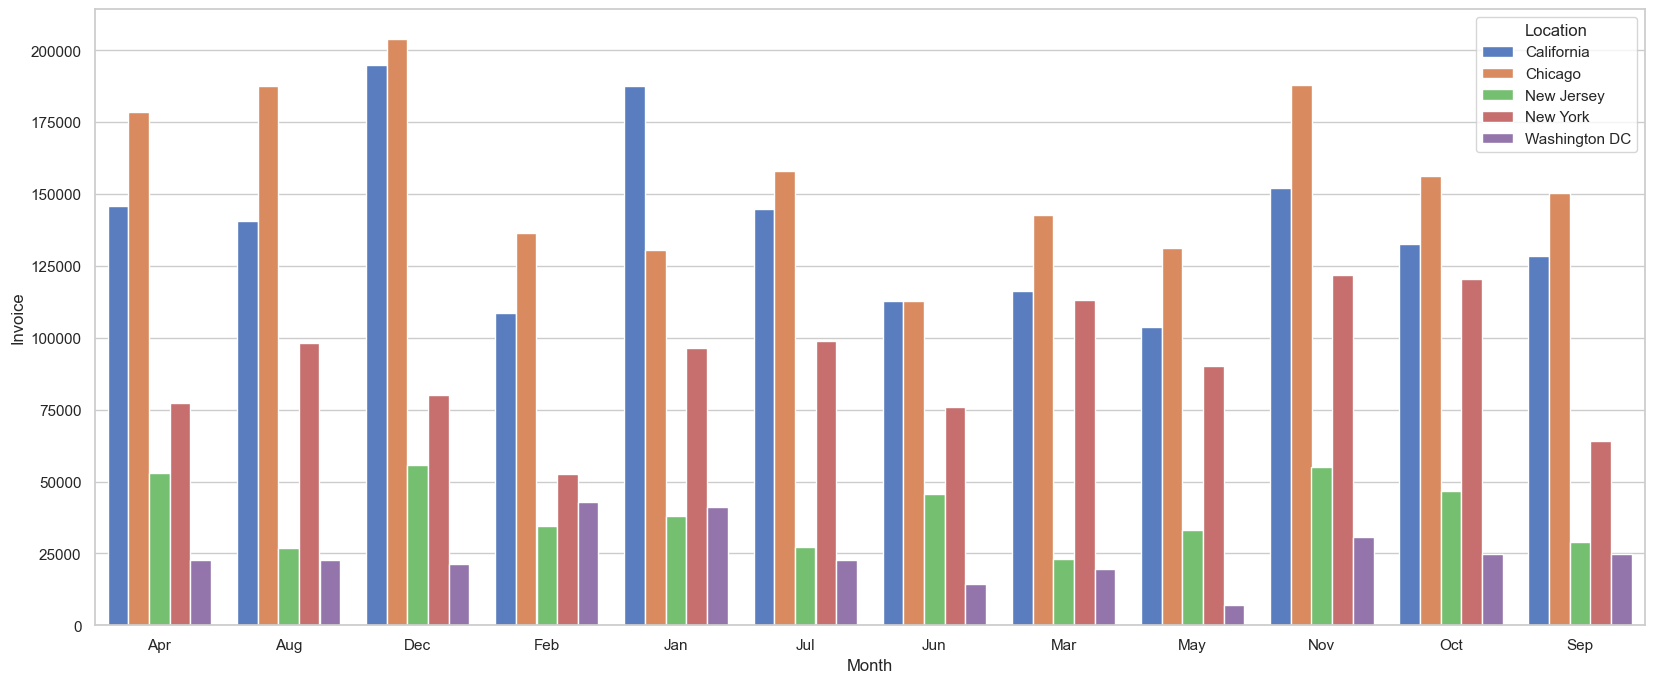

In [295]:
areaInYear = saleDiscountCusTaxData.groupby(['Month', 'Location'])['Invoice'].sum()

areaInYear = areaInYear.to_frame('Invoice').reset_index()

plt.figure(1, figsize = (20,8))
sns.barplot(data=areaInYear, x='Month', y='Invoice', hue='Location')

### sales by different categores in year

<Axes: xlabel='Month_Num', ylabel='Invoice'>

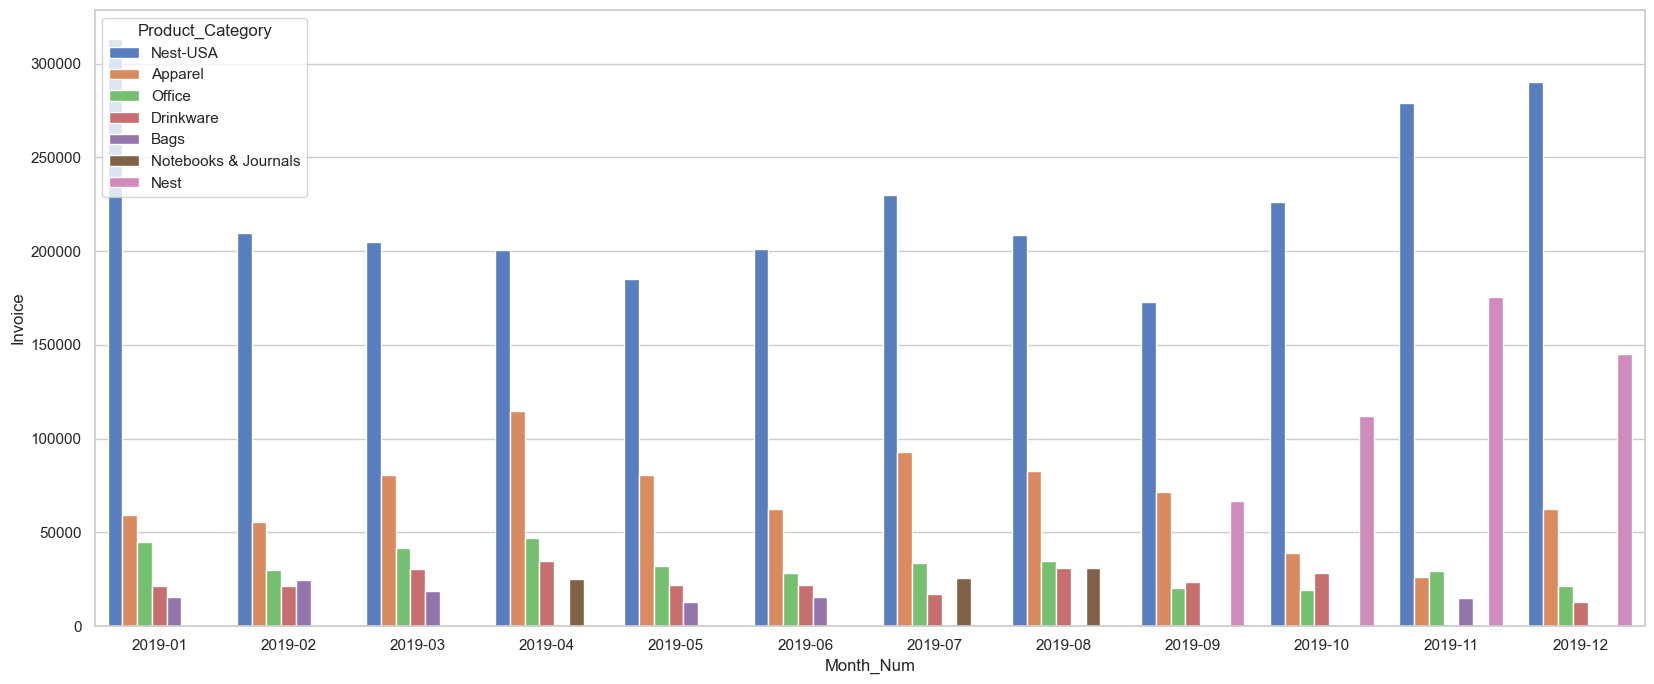

In [312]:
categoryInYear = saleDiscountCusTaxData.groupby(['Month_Num', 'Product_Category'])['Invoice'].sum()

categoryInYear = categoryInYear.to_frame('Invoice').reset_index()

categoryInYear.sort_values(['Month_Num', 'Invoice'], ascending=[1,0],inplace=True)

categoryInYearFinal = categoryInYear.groupby('Month_Num').head(5)

plt.figure(1, figsize = (20,8))
sns.barplot(data=categoryInYearFinal, x='Month_Num', y='Invoice', hue='Product_Category')

### sales by different categories in areas

<Axes: xlabel='Location', ylabel='Invoice'>

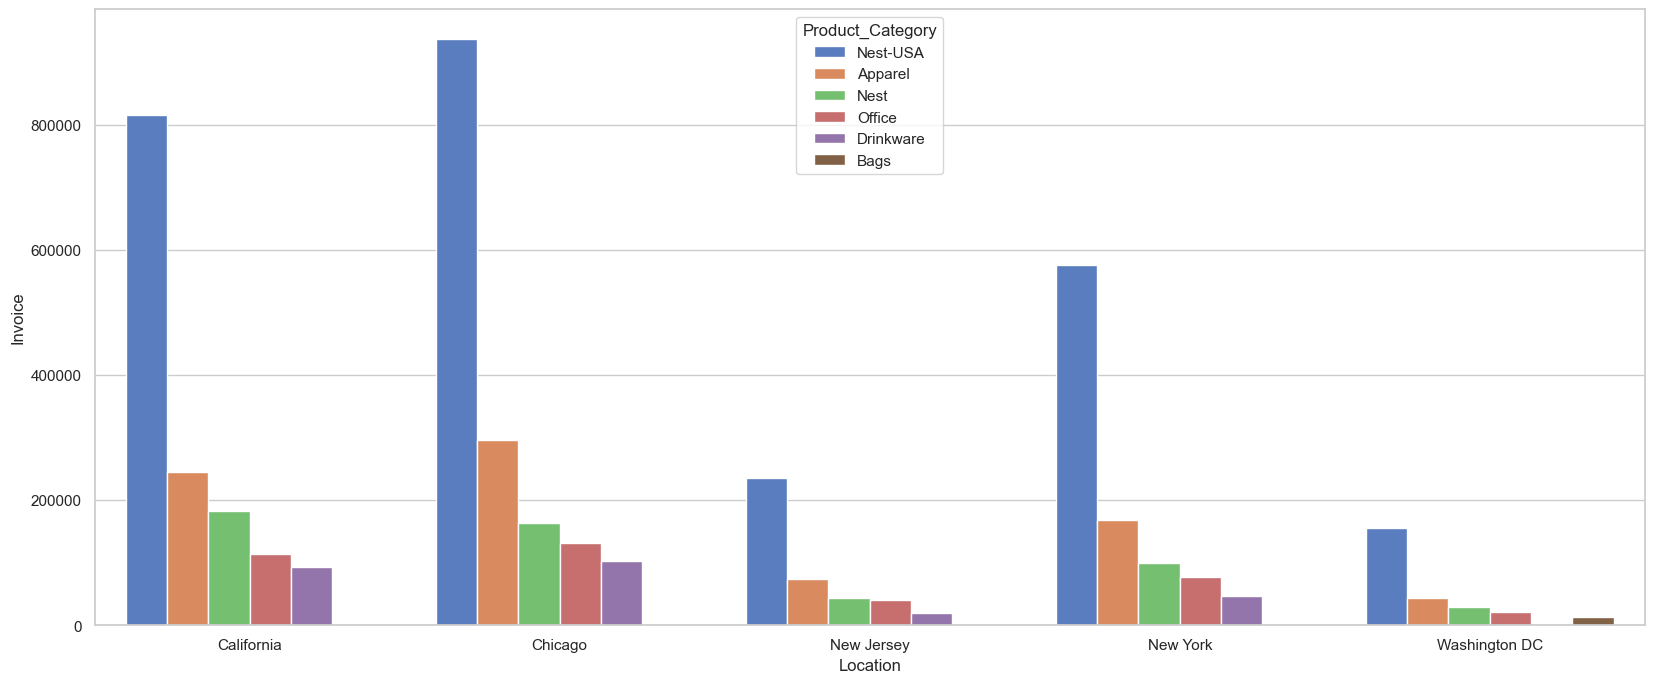

In [314]:
categoryInArea = saleDiscountCusTaxData.groupby(['Location', 'Product_Category'])['Invoice'].sum()

categoryInArea = categoryInArea.to_frame('Invoice').reset_index()

categoryInArea.sort_values(['Location', 'Invoice'], ascending=[1,0],inplace=True)

categoryInAreaFinal = categoryInArea.groupby('Location').head(5)

plt.figure(1, figsize = (20,8))
sns.barplot(data=categoryInAreaFinal, x='Location', y='Invoice', hue='Product_Category')



### How market spend is impacting the revenue

In [320]:
marketingSpendData.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [323]:
marketingSpendData['Date'] = pd.to_datetime(marketingSpendData['Date'], format='mixed')

marketingSpendData['Month_Num'] = marketingSpendData['Date'].dt.strftime('%Y-%m')

marketingSpendData.head(1)

,Date,Offline_Spend,Online_Spend,Month_Num
0,2019-01-01,4500,2424.5,2019-01


In [325]:
marketingSpendData['Total_Spend'] = marketingSpendData['Offline_Spend'] + marketingSpendData['Online_Spend']

marketingSpendData.head(1)

,Date,Offline_Spend,Online_Spend,Month_Num,Total_Spend
0,2019-01-01,4500,2424.5,2019-01,6924.5


In [327]:
spendInYear = marketingSpendData.groupby('Month_Num')['Total_Spend'].sum()

spendInYear = spendInYear.reset_index()

spendInYear

,Month_Num,Total_Spend
0,2019-01,154928.95
1,2019-02,137107.92
2,2019-03,122250.09
3,2019-04,157026.83
4,2019-05,118259.64
5,2019-06,134318.14
6,2019-07,120217.85
7,2019-08,142904.15
8,2019-09,135514.54
9,2019-10,151224.65


In [332]:
revenueAndSpend = pd.merge(yearRevenue, spendInYear, on='Month_Num', how='left')
revenueAndSpend

,Month_Num,Invoice,Total_Spend
0,2019-01,494090.54875,154928.95
1,2019-02,375162.04730,137107.92
2,2019-03,415157.79044,122250.09
3,2019-04,477498.59102,157026.83
4,2019-05,365596.02956,118259.64
5,2019-06,361000.17429,134318.14
6,2019-07,451878.40904,120217.85
7,2019-08,475796.87554,142904.15
8,2019-09,396510.49254,135514.54
9,2019-10,480767.36981,151224.65


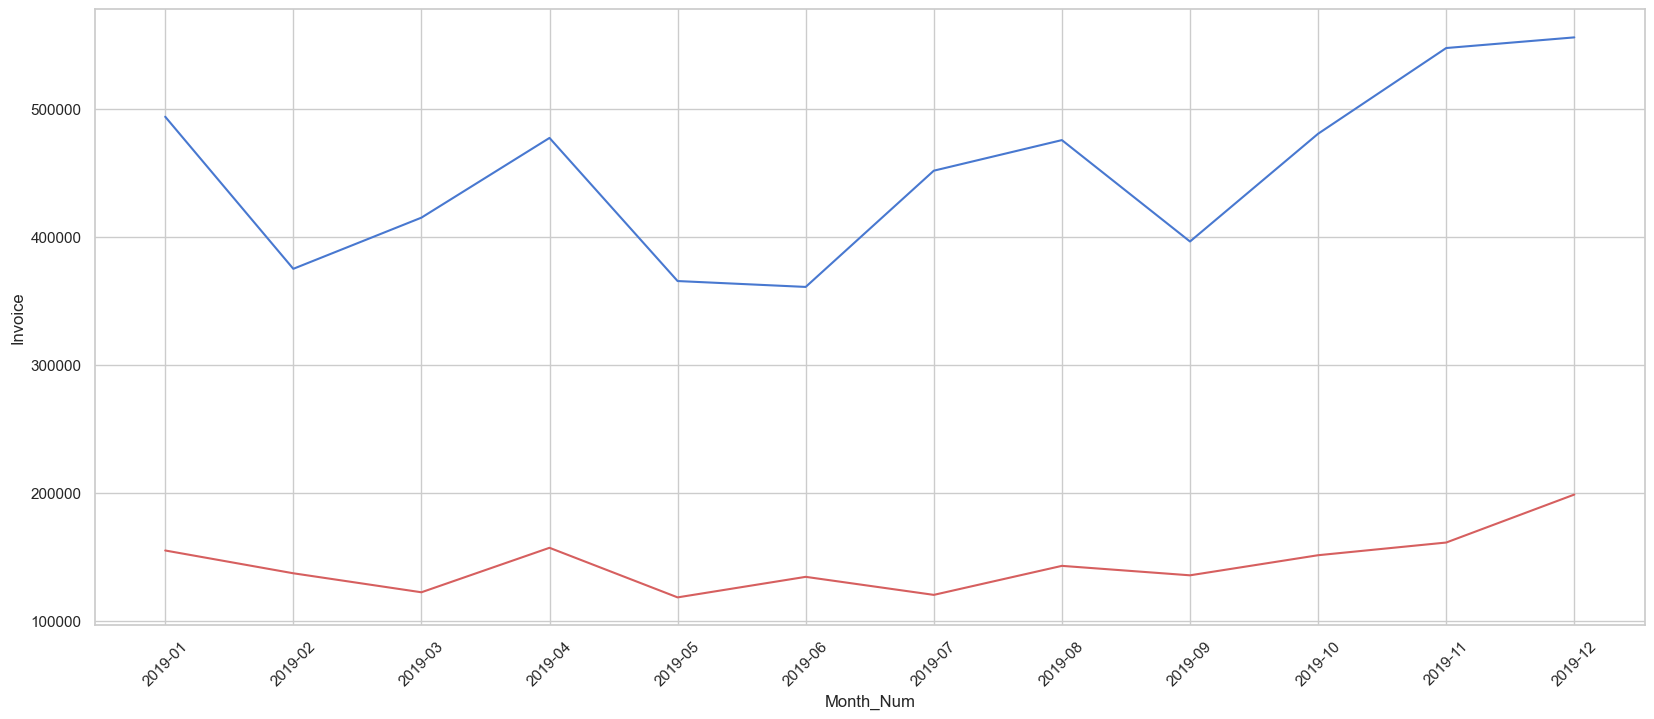

In [337]:
plt.figure(1, figsize = (20,8))
sns.lineplot(data=revenueAndSpend, x='Month_Num', y='Invoice', color='b')
ax = sns.lineplot(data=revenueAndSpend, x='Month_Num', y='Total_Spend', color='r')
for item in ax.get_xticklabels():
    item.set_rotation(45)


## 3.Performing Customer Segmentation  
### Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.

In [341]:
saleDiscountCusTaxData.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Month_Num,Coupon_Code,Discount_pct,Gender,Location,Tenure_Months,GST,Invoice,Week,Date
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019-01,ELEC10,10.0,M,Chicago,12,0.10,158.6729,2019-00,2019-01-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019-01,ELEC10,10.0,M,Chicago,12,0.10,158.6729,2019-00,2019-01-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,2019-01,OFF10,10.0,M,Chicago,12,0.10,8.5295,2019-00,2019-01-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,2019-01,SALE10,10.0,M,Chicago,12,0.18,109.9270,2019-00,2019-01-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,2019-01,AIO10,10.0,M,Chicago,12,0.18,24.0230,2019-00,2019-01-01


### Calculate RFM

In [351]:
# calculating by customer
today = pd.to_datetime('2020-01-01')
segment = saleDiscountCusTaxData.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (today - x.max()).days,  # recency
    'Transaction_ID': 'count',  # frequency
    'Invoice': 'sum'  # monetary 
}).rename(columns={'Transaction_Date':'recency',
                  'Transaction_ID':'frequency',
                  'Invoice':'monetary'}).reset_index()

segment.head()

,CustomerID,recency,frequency,monetary
0,12346,108,2,174.98174
1,12347,60,60,15686.84396
2,12348,74,23,1689.55594
3,12350,18,17,1467.43528
4,12356,108,36,2007.42900


In [390]:
# check the distribution of values 
segment['decile'] = pd.qcut(segment['monetary'], 10, labels=False)

segment.head()

,CustomerID,recency,frequency,monetary,decile,R_Segment,F_Segment,M_Segment,RFM_Segment,Grade
0,12346,108,2,174.98174,0,3,1,1,5,C
1,12347,60,60,15686.84396,9,2,4,4,10,A
2,12348,74,23,1689.55594,4,2,3,3,8,B
3,12350,18,17,1467.43528,4,1,3,3,7,B
4,12356,108,36,2007.42900,4,3,3,3,9,B


In [391]:
# show mean
tmpKeys = ['recency','frequency','monetary']
decileData = segment.groupby(['decile']).apply(lambda x: x[tmpKeys].mean())

decileData

,recency,frequency,monetary
decile,,,
0,187.517007,2.659864,89.939858
1,172.054422,7.503401,406.833263
2,157.537415,11.428571,791.593061
3,160.383562,14.383562,1191.649838
4,161.931973,19.238095,1734.431761
5,140.653061,24.952381,2390.438597
6,124.232877,34.773973,3281.994738
7,134.020408,45.823129,4552.540148
8,126.578231,64.149660,6835.356511


In [398]:
# divide customer
dividedCustomer = segment[['frequency','monetary','recency' ]].quantile(q=[0.2,0.5,0.8])

dividedCustomer

,frequency,monetary,recency
0.2,8.0,595.398024,41.0
0.5,21.0,2011.622610,132.0
0.8,53.0,5323.747460,249.6


In [399]:
dividedCustomer = dividedCustomer.to_dict()
dividedCustomer

{'frequency': {0.2: 8.0, 0.5: 21.0, 0.8: 53.0},
 'monetary': {0.2: 595.3980240000001,
  0.5: 2011.6226100000001,
  0.8: 5323.7474600000005},
 'recency': {0.2: 41.0, 0.5: 132.0, 0.8: 249.60000000000014}}

In [400]:
# define REF calculate method
def Calculate_Segment(value, decile_dict):
    if value > decile_dict[0.8]:
        return 3
    if value > decile_dict[0.5]:
        return 2
    if value > decile_dict[0.2]:
        return 1
    return 0

In [558]:
segment['R_Segment'] = segment['recency'].apply(lambda x : Calculate_Segment(x, dividedCustomer['recency']))
segment['F_Segment'] = segment['frequency'].apply(lambda x : Calculate_Segment(x, dividedCustomer['frequency']))
segment['M_Segment'] = segment['monetary'].apply(lambda x : Calculate_Segment(x, dividedCustomer['monetary']))

# sum R_Segment, F_Segment, M_Setment as RFM_Setment, the weight are all 1
segment['RFM_Segment'] = segment['R_Segment'] + segment['F_Segment'] + segment['M_Segment']

def get_customer_grade(RFM_Score):
    if RFM_Score < 3:
        return 'Standard'
    if RFM_Score < 6:
        return 'Silver'
    if RFM_Score < 9:
        return 'Gold'
    return 'Premium'


segment['Grade'] = segment['RFM_Segment'].apply(get_customer_grade)

segment.head()

,CustomerID,recency,frequency,monetary,decile,R_Segment,F_Segment,M_Segment,RFM_Segment,Grade,kmean_predict,Kmean_Grade,Customer_Value
0,12346,108,2,174.98174,0,1,0,0,1,Standard,3,Silver,Low Value
1,12347,60,60,15686.84396,9,1,3,3,7,Gold,1,Gold,High Value
2,12348,74,23,1689.55594,4,1,2,1,4,Silver,3,Silver,Medium Value
3,12350,18,17,1467.43528,4,0,1,1,2,Standard,3,Silver,Medium Value
4,12356,108,36,2007.42900,4,1,2,1,4,Silver,3,Silver,Medium Value


### Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

In [417]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

segment_df = segment.loc[:,['recency', 'frequency', 'monetary']]
segment_df.head()

,recency,frequency,monetary
0,108,2,174.98174
1,60,60,15686.84396
2,74,23,1689.55594
3,18,17,1467.43528
4,108,36,2007.42900


In [426]:
# standardize data
sc = StandardScaler()
scSegment = sc.fit_transform(segment_df)

standardSegment.head()

,recency,frequency,monetary
0,-0.365961,-0.669410,-0.599185
1,-0.837001,0.470788,2.055096
2,-0.699614,-0.256579,-0.340022
3,-1.249160,-0.374531,-0.378030
4,-0.365961,-0.001018,-0.285630


In [431]:
#KMeans Clustering   input: standardized data, number of cluster
km_3 = KMeans(n_clusters=3, random_state=6).fit_predict(standardSegment)
km_4 = KMeans(n_clusters=4, random_state=6).fit_predict(standardSegment)
km_5 = KMeans(n_clusters=5, random_state=6).fit_predict(standardSegment)
km_6 = KMeans(n_clusters=6, random_state=6).fit_predict(standardSegment)


print('km_3 =',silhouette_score(standardSegment, km_3))
print('km_4 =',silhouette_score(standardSegment, km_4))
print('km_5 =',silhouette_score(standardSegment, km_5))
print('km_6 =',silhouette_score(standardSegment, km_6))

C:\Users\skywa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\skywa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\skywa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\skywa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

km_3 = 0.3986812074309163
km_4 = 0.4513321388884512
km_5 = 0.43644012089457923
km_6 = 0.39387741651283037


In [437]:
# use km = 4
segment['kmean_predict'] = km_4

segment.head()

,CustomerID,recency,frequency,monetary,decile,R_Segment,F_Segment,M_Segment,RFM_Segment,Grade,kmean_predict,Kmean_Grade
0,12346,108,2,174.98174,0,1,0,0,1,Standard,3,Standard
1,12347,60,60,15686.84396,9,1,3,3,7,Gold,1,Gold
2,12348,74,23,1689.55594,4,1,2,1,4,Silver,3,Standard
3,12350,18,17,1467.43528,4,0,1,1,2,Standard,3,Standard
4,12356,108,36,2007.42900,4,1,2,1,4,Silver,3,Standard


In [438]:
segment.groupby('kmean_predict')[['recency', 'frequency', 'monetary']].mean()

,recency,frequency,monetary
kmean_predict,,,
0,255.359347,20.695100,1993.572948
1,85.437908,121.372549,12916.243788
2,30.200000,590.400000,70779.311820
3,78.212121,26.349144,2593.963364


In [441]:
# show customer grade by kmean_predict
def get_customer_grade_by_kmean(kmeanValue):
    if kmeanValue == 0:
        return 'Standard'
    if kmeanValue == 1:
        return 'Gold'
    if kmeanValue == 2:
        return 'Premium'
    if kmeanValue == 3:
        return 'Silver'
    return 'Unkonwn'

segment['Kmean_Grade'] = segment['kmean_predict'].apply(get_customer_grade_by_kmean)

In [442]:
segment['Grade'].value_counts()

Grade
Silver      710
Gold        450
Standard    276
Premium      32
Name: count, dtype: int64

In [443]:
segment['Kmean_Grade'].value_counts()

Kmean_Grade
Silver      759
Standard    551
Gold        153
Premium       5
Name: count, dtype: int64

## 4.Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)
### First define dependent variable with categories low value, medium value, high value using customer revenue.

In [468]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [445]:
segment.head()

,CustomerID,recency,frequency,monetary,decile,R_Segment,F_Segment,M_Segment,RFM_Segment,Grade,kmean_predict,Kmean_Grade
0,12346,108,2,174.98174,0,1,0,0,1,Standard,3,Silver
1,12347,60,60,15686.84396,9,1,3,3,7,Gold,1,Gold
2,12348,74,23,1689.55594,4,1,2,1,4,Silver,3,Silver
3,12350,18,17,1467.43528,4,0,1,1,2,Standard,3,Silver
4,12356,108,36,2007.42900,4,1,2,1,4,Silver,3,Silver


In [452]:
# check the distribution of values 
tmp = segment['monetary'].quantile(q=[0.2,0.4,0.5,0.8])

tmp

0.2     595.398024
0.4    1432.435648
0.5    2011.622610
0.8    5323.747460
Name: monetary, dtype: float64

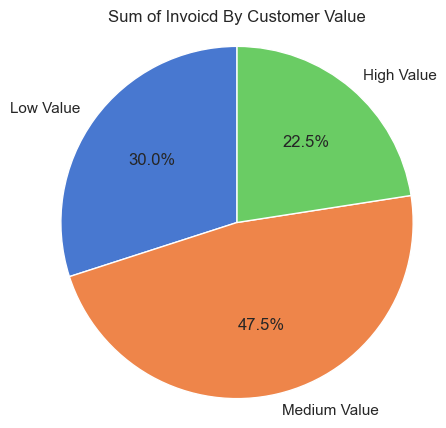

In [476]:
segment['Customer_Value'] = pd.cut(segment['monetary'], bins=[0, 1000, 5000, float('inf')], labels=['Low Value', 'Medium Value', 'High Value'])

customerValuePieData = segment.groupby('Customer_Value')['CustomerID'].count()

customerValuePieData

sns.set_style('whitegrid')

plt.figure(figsize=(5,5))
plt.pie(customerValuePieData, labels=customerValuePieData.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Sum of Invoicd By Customer Value')

plt.show()

### perform Classification model

### LogisticRegression

In [478]:
# use Logistic model
logisticRegression = LogisticRegression()

# split data to train set and test set
X_train, X_test, y_train, y_test = train_test_split(segment[['monetary']], segment['Customer_Value'], test_size=0.3, random_state=6)


# train
logisticRegression.fit(X_train, y_train)

# try predict
yPredict = logisticRegression.predict(X_test)

# evaluate
accuracy = accuracy_score(y_test, yPredict)
report = classification_report(y_test, yPredict)

print(f'Accuracy: {accuracy}')
print(report)


Accuracy: 0.9977324263038548
              precision    recall  f1-score   support

  High Value       1.00      1.00      1.00        86
   Low Value       0.99      1.00      1.00       137
Medium Value       1.00      1.00      1.00       218

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



### DecisionTree

In [482]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [485]:
# prepare
param_grid = {'max_depth': np.arange(2, 50),
             'max_features': np.arange(4,100)}
decisionTree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3,n_jobs=-1, verbose=True)
decisionTree.fit(X_train, y_train)

Fitting 3 folds for each of 4608 candidates, totalling 13824 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             verbose=True)

In [486]:
print('Best parameters : ',decisionTree.best_params_)
print('Accuracy : ' ,decisionTree.best_score_)

Best parameters :  {'max_depth': 2, 'max_features': 4}
Accuracy :  0.9990253411306043


In [487]:
yPredict = decisionTree.predict(X_test)

# evaluate
accuracy = accuracy_score(y_test, yPredict)
report = classification_report(y_test, yPredict)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.9977324263038548
              precision    recall  f1-score   support

  High Value       1.00      1.00      1.00        86
   Low Value       0.99      1.00      1.00       137
Medium Value       1.00      1.00      1.00       218

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



## 5.Cross-Selling (Which products are selling together)
### You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together

In [492]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [493]:
saleDiscountCusTaxData.head(1)


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Month_Num,Coupon_Code,Discount_pct,Gender,Location,Tenure_Months,GST,Invoice,Week,Date
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019-01,ELEC10,10.0,M,Chicago,12,0.1,158.6729,2019-00,2019-01-01


In [498]:
customerProductData = saleDiscountCusTaxData.groupby(['CustomerID', 'Product_Description'])['Quantity'].sum().unstack().fillna(0)

customerProductData.head()

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,25L Classic Rucksack,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [505]:
customerProductData[customerProductData > 0] = 1

customerProductData.head()

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,25L Classic Rucksack,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [506]:
# find frequent items by apriori algorithm
frequentItemSet = apriori(customerProductData, min_support=0.1, use_colnames=True)

frequentItemSet

C:\Users\skywa\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.198910,(26 oz Double Wall Insulated Bottle)
1,0.153951,(8 pc Android Sticker Sheet)
2,0.136921,(Android Rise 14 oz Mug)
3,0.111717,(Android Sticker Sheet Ultra Removable)
4,0.135559,(Badge Holder)
...,...,...
1104,0.100136,(Nest Protect Smoke + CO White Wired Alarm-USA...
1105,0.102861,(Nest Protect Smoke + CO White Wired Alarm-USA...
1106,0.102861,"(Nest Cam IQ - USA, Nest Learning Thermostat 3..."
1107,0.138283,(Nest Protect Smoke + CO White Wired Alarm-USA...


In [513]:
frequentItemSet.sort_values('support', ascending=False).head()

,support,itemsets
44,0.649183,(Nest Cam Indoor Security Camera - USA)
47,0.648501,(Nest Learning Thermostat 3rd Gen-USA - Stainl...
45,0.647139,(Nest Cam Outdoor Security Camera - USA)
247,0.539510,"(Nest Cam Outdoor Security Camera - USA, Nest ..."
249,0.525204,(Nest Learning Thermostat 3rd Gen-USA - Stainl...


In [514]:
associationRulesDf = association_rules(frequentItemSet, metric='lift', min_threshold=0.6)

associationRulesDf.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Google Laptop and Cell Phone Stickers),(26 oz Double Wall Insulated Bottle),0.346730,0.198910,0.106267,0.306483,1.540813,0.037299,1.155113,0.537285
1,(26 oz Double Wall Insulated Bottle),(Google Laptop and Cell Phone Stickers),0.198910,0.346730,0.106267,0.534247,1.540813,0.037299,1.402609,0.438143
2,(Google Sunglasses),(26 oz Double Wall Insulated Bottle),0.336512,0.198910,0.104223,0.309717,1.557068,0.037288,1.160523,0.539222
3,(26 oz Double Wall Insulated Bottle),(Google Sunglasses),0.198910,0.336512,0.104223,0.523973,1.557068,0.037288,1.393802,0.446601
4,(Nest Cam Indoor Security Camera - USA),(26 oz Double Wall Insulated Bottle),0.649183,0.198910,0.158719,0.244491,1.229154,0.029590,1.060332,0.531422


In [515]:
associationRulesDf.sort_values(by='confidence', ascending=False ).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7164,(Nest Protect Smoke + CO White Wired Alarm-USA...,(Nest Cam Indoor Security Camera - USA),0.102180,0.649183,0.101499,0.993333,1.530129,0.035165,52.622616,0.385891
5588,(Nest Protect Smoke + CO White Wired Alarm-USA...,(Nest Cam Indoor Security Camera - USA),0.100817,0.649183,0.100136,0.993243,1.529991,0.034687,51.920981,0.385240
10166,(Nest Protect Smoke + CO White Wired Alarm-USA...,(Nest Cam Indoor Security Camera - USA),0.100817,0.649183,0.100136,0.993243,1.529991,0.034687,51.920981,0.385240
8664,(Nest Protect Smoke + CO White Wired Alarm-USA...,(Nest Cam Indoor Security Camera - USA),0.134196,0.649183,0.132834,0.989848,1.524760,0.045716,34.555518,0.397502
10786,(Nest Protect Smoke + CO White Wired Alarm-USA...,(Nest Cam Indoor Security Camera - USA),0.131471,0.649183,0.130109,0.989637,1.524436,0.044760,33.853883,0.396095


In [520]:
# get the data having high confidence of over 0.8
result = associationRulesDf[(associationRulesDf['confidence'] >= 0.9)]

result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
498,"(Nest Cam Indoor Security Camera - USA, 26 oz ...",(Nest Cam Outdoor Security Camera - USA),0.158719,0.647139,0.143733,0.905579,1.399358,0.041019,3.737119,0.339229
515,(Nest Protect Smoke + CO White Wired Alarm-USA...,(Nest Cam Indoor Security Camera - USA),0.115123,0.649183,0.107629,0.934911,1.440136,0.032894,5.389832,0.345383
545,(Nest Protect Smoke + CO White Wired Alarm-USA...,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.115123,0.648501,0.106267,0.923077,1.423400,0.031610,4.569482,0.336156
551,"(Nest Cam Outdoor Security Camera - USA, 8 pc ...",(Nest Cam Indoor Security Camera - USA),0.128747,0.649183,0.117847,0.915344,1.409995,0.034267,4.144031,0.333746
552,"(Nest Cam Indoor Security Camera - USA, 8 pc A...",(Nest Cam Outdoor Security Camera - USA),0.128747,0.647139,0.117847,0.915344,1.414447,0.034530,4.168171,0.336309
...,...,...,...,...,...,...,...,...,...,...
11096,"(Nest Thermostat E - USA, Nest Protect Smoke +...",(Nest Cam Indoor Security Camera - USA),0.102180,0.649183,0.100136,0.980000,1.509591,0.033803,17.540872,0.375987
11097,"(Nest Thermostat E - USA, Nest Protect Smoke +...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.103542,0.648501,0.100136,0.967105,1.491293,0.032989,10.685559,0.367492
11102,"(Nest Thermostat E - USA, Nest Learning Thermo...","(Nest Cam Outdoor Security Camera - USA, Nest ...",0.107629,0.539510,0.100136,0.930380,1.724492,0.042069,6.614318,0.470790
11104,"(Nest Thermostat E - USA, Nest Cam Indoor Secu...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.108992,0.523161,0.100136,0.918750,1.756152,0.043116,5.868791,0.483243


## 6.Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)

In [527]:
saleDiscountCusData.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Month_Num,Coupon_Code,Discount_pct,Gender,Location,Tenure_Months
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019-01,ELEC10,10.0,M,Chicago,12
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019-01,ELEC10,10.0,M,Chicago,12
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,2019-01,OFF10,10.0,M,Chicago,12
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,2019-01,SALE10,10.0,M,Chicago,12
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,2019-01,AIO10,10.0,M,Chicago,12


In [528]:
# remove customers transaction count less than 2
mulTranCustomers = saleDiscountCusData.groupby('CustomerID').filter(lambda c: len(c) > 1)
mulTranCustomers.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Month_Num,Coupon_Code,Discount_pct,Gender,Location,Tenure_Months
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019-01,ELEC10,10.0,M,Chicago,12
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019-01,ELEC10,10.0,M,Chicago,12
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,2019-01,OFF10,10.0,M,Chicago,12
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,2019-01,SALE10,10.0,M,Chicago,12
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,2019-01,AIO10,10.0,M,Chicago,12


In [537]:
# calculate customer average purchase days between two transactions
betweenDays = mulTranCustomers.groupby('CustomerID')['Transaction_Date'].apply(lambda d: d.diff().mean().days)

betweenDays = betweenDays.reset_index()

betweenDays.head()

,CustomerID,Transaction_Date
0,12346,0
1,12347,3
2,12348,5
3,12350,0
4,12356,0


In [551]:
# label customer different type
def get_diff_days_value(diffDays):
    if diffDays.Transaction_Date > 90:
        return 3
    if diffDays.Transaction_Date > 60:
        return 2
    if diffDays.Transaction_Date > 30:
        return 1
    return 0



def get_diff_days_label(labelValue):
    if labelValue.Next_Purchase_Day == 3:
        return '90+ days'
    if labelValue.Next_Purchase_Day == 2:
        return '60-90 days'
    if labelValue.Next_Purchase_Day == 1:
        return '30-60 days'
    return '0-30 days'

In [553]:
betweenDays['Next_Purchase_Day'] = betweenDays.apply(get_diff_days_value, axis=1)
betweenDays['Next_Purchase_Label'] = betweenDays.apply(get_diff_days_label, axis=1)

betweenDays['Next_Purchase_Day'].value_counts()

Next_Purchase_Day
0    1385
1      11
3       5
2       1
Name: count, dtype: int64

In [563]:
resultDf = pd.merge(segment, betweenDays, on='CustomerID', how='right')

resultDf.head()

,CustomerID,recency,frequency,monetary,decile,R_Segment,F_Segment,M_Segment,RFM_Segment,Grade,kmean_predict,Kmean_Grade,Customer_Value,Transaction_Date,Next_Purchase_Day,Next_Purchase_Label
0,12346,108,2,174.98174,0,1,0,0,1,Standard,3,Silver,Low Value,0,0,0-30 days
1,12347,60,60,15686.84396,9,1,3,3,7,Gold,1,Gold,High Value,3,0,0-30 days
2,12348,74,23,1689.55594,4,1,2,1,4,Silver,3,Silver,Medium Value,5,0,0-30 days
3,12350,18,17,1467.43528,4,0,1,1,2,Standard,3,Silver,Medium Value,0,0,0-30 days
4,12356,108,36,2007.42900,4,1,2,1,4,Silver,3,Silver,Medium Value,0,0,0-30 days


In [567]:
# transform string to int on related properties
def transform_grade(x):
    if x.Grade == 'Standard':
        return 0
    if x.Grade == 'Silver':
        return 1
    if x.Grade == 'Gold':
        return 2
    return 3


def transform_kmean_grade(x):
    if x.Kmean_Grade == 'Standard':
        return 0
    if x.Kmean_Grade == 'Silver':
        return 1
    if x.Kmean_Grade == 'Gold':
        return 2
    return 3


def transform_customer_value(x):
    if x.Customer_Value == 'Low Value':
        return 0
    if x.Customer_Value == 'Medium Value':
        return 1
    return 2


resultDf['Grade'] = resultDf.apply(transform_grade, axis=1)
resultDf['Kmean_Grade'] = resultDf.apply(transform_kmean_grade, axis=1)
resultDf['Customer_Value'] = resultDf.apply(transform_customer_value, axis=1)

resultDf.head()

,CustomerID,recency,frequency,monetary,decile,R_Segment,F_Segment,M_Segment,RFM_Segment,Grade,kmean_predict,Kmean_Grade,Customer_Value,Transaction_Date,Next_Purchase_Day,Next_Purchase_Label
0,12346,108,2,174.98174,0,1,0,0,1,3,3,3,2,0,0,0-30 days
1,12347,60,60,15686.84396,9,1,3,3,7,3,1,3,2,3,0,0-30 days
2,12348,74,23,1689.55594,4,1,2,1,4,3,3,3,2,5,0,0-30 days
3,12350,18,17,1467.43528,4,0,1,1,2,3,3,3,2,0,0,0-30 days
4,12356,108,36,2007.42900,4,1,2,1,4,3,3,3,2,0,0,0-30 days


In [570]:
# prepare train data set and test data set
X_Total = resultDf.drop(['Next_Purchase_Day', 'Next_Purchase_Label'], axis=1)
y_Total = resultDf['Next_Purchase_Day']

X_train, X_test, y_train, y_test = train_test_split(X_Total, y_Total, test_size=0.2, random_state=6)

In [575]:
logisticModel = LogisticRegression(max_iter=100000)
logisticModel.fit(X_train, y_train)
# try predict
yPredict = logisticModel.predict(X_test)

# evaluate
accuracy = accuracy_score(y_test, yPredict)
report = classification_report(y_test, yPredict)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00         2

    accuracy                           1.00       281
   macro avg       1.00      1.00      1.00       281
weighted avg       1.00      1.00      1.00       281



### Try Decision Tree

In [576]:
# prepare
param_grid = {'max_depth': np.arange(2, 50),
             'max_features': np.arange(4,100)}
decisionTree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3,n_jobs=-1, verbose=True)
decisionTree.fit(X_train, y_train)

print('Best parameters : ',decisionTree.best_params_)
print('Accuracy : ' ,decisionTree.best_score_)

Fitting 3 folds for each of 4608 candidates, totalling 13824 fits


C:\Users\skywa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best parameters :  {'max_depth': 2, 'max_features': 5}
Accuracy :  0.999108734402852


In [577]:
yPredict = decisionTree.predict(X_test)

# evaluate
accuracy = accuracy_score(y_test, yPredict)
report = classification_report(y_test, yPredict)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.9928825622775801
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       279
           1       0.00      0.00      0.00         2

    accuracy                           0.99       281
   macro avg       0.50      0.50      0.50       281
weighted avg       0.99      0.99      0.99       281



C:\Users\skywa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\skywa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\skywa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 7.Perform cohort analysis by defining below cohorts

In [673]:
saleDiscountCusTaxData.head()

,level_0,index,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,...,Coupon_Code,Discount_pct,Gender,Location,Tenure_Months,GST,Invoice,Week,Date,Cohort
0,0,0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,...,ELEC10,10.0,M,Chicago,12,0.10,158.6729,2019-00,2019-01-01,2019-01
1,1,1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,...,ELEC10,10.0,M,Chicago,12,0.10,158.6729,2019-00,2019-01-01,2019-01
2,2,2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,...,OFF10,10.0,M,Chicago,12,0.10,8.5295,2019-00,2019-01-01,2019-01
3,3,3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,...,SALE10,10.0,M,Chicago,12,0.18,109.9270,2019-00,2019-01-01,2019-01
4,4,4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,...,AIO10,10.0,M,Chicago,12,0.18,24.0230,2019-00,2019-01-01,2019-01


In [720]:
calculateData = saleDiscountCusTaxData.drop(
    ['Product_SKU', 'Product_Description', 'Product_Category','Coupon_Status', 'Coupon_Code', 'Discount_pct'], axis=1)

calculateData.set_index('CustomerID', inplace=True)
calculateData['Cohort'] = calculateData.groupby('CustomerID')['Transaction_Date'].min().apply(lambda x: x.strftime('%Y-%m'))
calculateData.reset_index(inplace=True)
calculateData.head()

,CustomerID,level_0,index,Transaction_ID,Transaction_Date,Quantity,Avg_Price,Delivery_Charges,Month,Month_Num,Gender,Location,Tenure_Months,GST,Invoice,Week,Date,Cohort
0,17850,0,0,16679,2019-01-01,1,153.71,6.5,Jan,2019-01,M,Chicago,12,0.10,158.6729,2019-00,2019-01-01,2019-01
1,17850,1,1,16680,2019-01-01,1,153.71,6.5,Jan,2019-01,M,Chicago,12,0.10,158.6729,2019-00,2019-01-01,2019-01
2,17850,2,2,16681,2019-01-01,1,2.05,6.5,Jan,2019-01,M,Chicago,12,0.10,8.5295,2019-00,2019-01-01,2019-01
3,17850,3,3,16682,2019-01-01,5,17.53,6.5,Jan,2019-01,M,Chicago,12,0.18,109.9270,2019-00,2019-01-01,2019-01
4,17850,4,4,16682,2019-01-01,1,16.50,6.5,Jan,2019-01,M,Chicago,12,0.18,24.0230,2019-00,2019-01-01,2019-01


In [763]:
groupData = calculateData.groupby(['Cohort', 'Month_Num'])

cohortDatas = groupData.agg({
    'CustomerID': pd.Series.nunique,
    'Transaction_ID': pd.Series.nunique,
    'Invoice': pd.Series.sum
})

cohortDatas.rename(columns={'CustomerID': 'Customer Count',
                        'Transaction_ID': 'Trade Count','Invoice':'Revenue'}, inplace=True)

cohortDatas

Customer Count  Trade Count       Revenue
Cohort  Month_Num                                           
2019-01 2019-01               215         2102  494090.54875
        2019-02                13          218   46524.59322
        2019-03                24          294   59216.90012
        2019-04                34          353  132405.38909
        2019-05                23          216   35918.34904
...                           ...          ...           ...
2019-10 2019-11                 6           29   10573.87820
        2019-12                 4           17    2902.18245
2019-11 2019-11                68         1044  234631.52196
        2019-12                 7           21    4919.36123
2019-12 2019-12               106         1288  263414.92764

[78 rows x 3 columns]

In [764]:
def add_cohort_track_month(cohortData):
    cohortData['Cohort_Track_Month'] = np.arange(len(cohortData)) + 1
    return cohortData


cohortDatas = cohortDatas.groupby(level=0, as_index=False).apply(add_cohort_track_month)

cohortDatas.head(13)

Customer Count  Trade Count       Revenue  \
  Cohort  Month_Num                                              
0 2019-01 2019-01               215         2102  494090.54875   
          2019-02                13          218   46524.59322   
          2019-03                24          294   59216.90012   
          2019-04                34          353  132405.38909   
          2019-05                23          216   35918.34904   
          2019-06                44          355   58146.40464   
          2019-07                35          400  100027.13066   
          2019-08                47          337   60820.88628   
          2019-09                23          240   45279.91794   
          2019-10                28          252   53424.65220   
          2019-11                20          190   43409.50500   
          2019-12                34          459   98246.97951   
1 2019-02 2019-02                96         1461  328637.45408   

                     Cohort_Track_Month  
  Cohort  Month_Num                      
0 2019-01 2019-01                     1  
          2019-02                     2  
          2019-03                     3  
          2019-04                     4  
          2019-05                     5  
          2019-06                     6  
          2019-07                     7  
          2019-08                     8  
          2019-09                     9  
          2019-10                    10  
          2019-11                    11  
          2019-12                    12  
1 2019-02 2019-02                     1

In [765]:
cohortDatas.reset_index(inplace=True)
cohortDatas.set_index(['Cohort', 'Cohort_Track_Month'], inplace=True)

cohortDatas.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 78 entries, ('2019-01', 1) to ('2019-12', 1)
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   level_0         78 non-null     int64  
 1   Month_Num       78 non-null     object 
 2   Customer Count  78 non-null     int64  
 3   Trade Count     78 non-null     int64  
 4   Revenue         78 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB


In [768]:
cohortDatas['Customer Count'].unstack(0)

Cohort,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
Cohort_Track_Month,,,,,,,,,,,,
1,215.0,96.0,177.0,163.0,112.0,137.0,94.0,135.0,78.0,87.0,68.0,106.0
2,13.0,7.0,18.0,14.0,12.0,20.0,13.0,14.0,6.0,6.0,7.0,NaN
3,24.0,9.0,35.0,24.0,9.0,22.0,4.0,15.0,3.0,4.0,NaN,NaN
4,34.0,16.0,25.0,24.0,13.0,12.0,6.0,10.0,2.0,NaN,NaN,NaN
5,23.0,17.0,32.0,18.0,10.0,11.0,11.0,8.0,NaN,NaN,NaN,NaN
6,44.0,22.0,33.0,15.0,13.0,14.0,9.0,NaN,NaN,NaN,NaN,NaN
7,35.0,19.0,22.0,10.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
8,47.0,15.0,22.0,16.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,23.0,12.0,15.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [789]:
cohortBaseDatas = cohortDatas['Customer Count'].groupby('Cohort').first()
cohortBaseDatas.head(20)

Cohort
2019-01    215
2019-02     96
2019-03    177
2019-04    163
2019-05    112
2019-06    137
2019-07     94
2019-08    135
2019-09     78
2019-10     87
2019-11     68
2019-12    106
Name: Customer Count, dtype: int64

In [790]:
retentionResult = cohortDatas['Customer Count'].unstack(0).divide(cohortBaseDatas, axis=1)
retentionResult

Cohort,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
Cohort_Track_Month,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.060465,0.072917,0.101695,0.085890,0.107143,0.145985,0.138298,0.103704,0.076923,0.068966,0.102941,NaN
3,0.111628,0.093750,0.197740,0.147239,0.080357,0.160584,0.042553,0.111111,0.038462,0.045977,NaN,NaN
4,0.158140,0.166667,0.141243,0.147239,0.116071,0.087591,0.063830,0.074074,0.025641,NaN,NaN,NaN
5,0.106977,0.177083,0.180791,0.110429,0.089286,0.080292,0.117021,0.059259,NaN,NaN,NaN,NaN
6,0.204651,0.229167,0.186441,0.092025,0.116071,0.102190,0.095745,NaN,NaN,NaN,NaN,NaN
7,0.162791,0.197917,0.124294,0.061350,0.125000,0.080292,NaN,NaN,NaN,NaN,NaN,NaN
8,0.218605,0.156250,0.124294,0.098160,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.106977,0.125000,0.084746,0.073620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Cohort', ylabel='Cohort_Track_Month'>

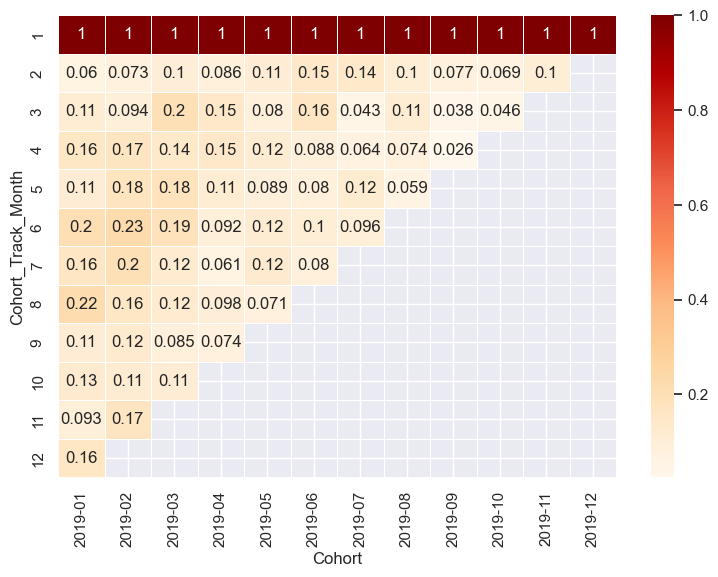

In [810]:
sns.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data=retentionResult, cmap='OrRd', annot=True, linewidths=0.5, ax=ax)
#_ = plt.xticks(rotation=45)